Missing values per column:
Sale Date      0
Customer ID    0
EV Model       0
Sales Price    0
Age            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sale Date    10 non-null     datetime64[ns]
 1   Customer ID  10 non-null     int64         
 2   EV Model     10 non-null     object        
 3   Sales Price  10 non-null     int64         
 4   Age          10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 532.0+ bytes


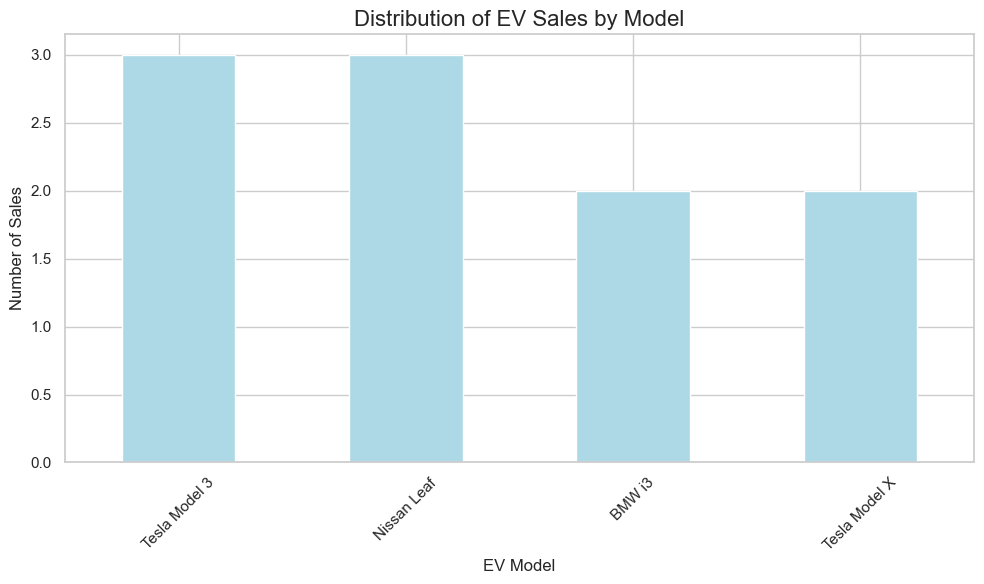

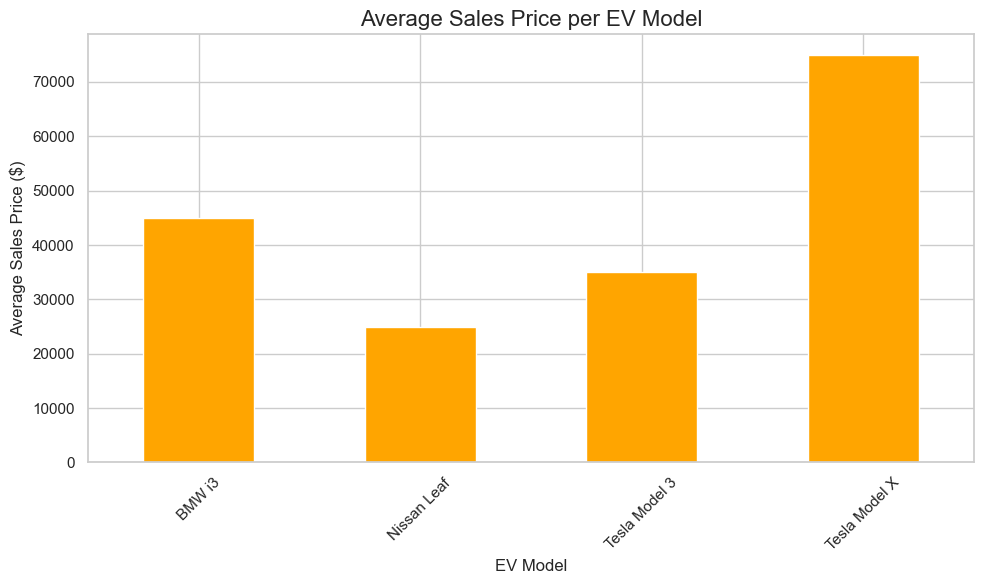

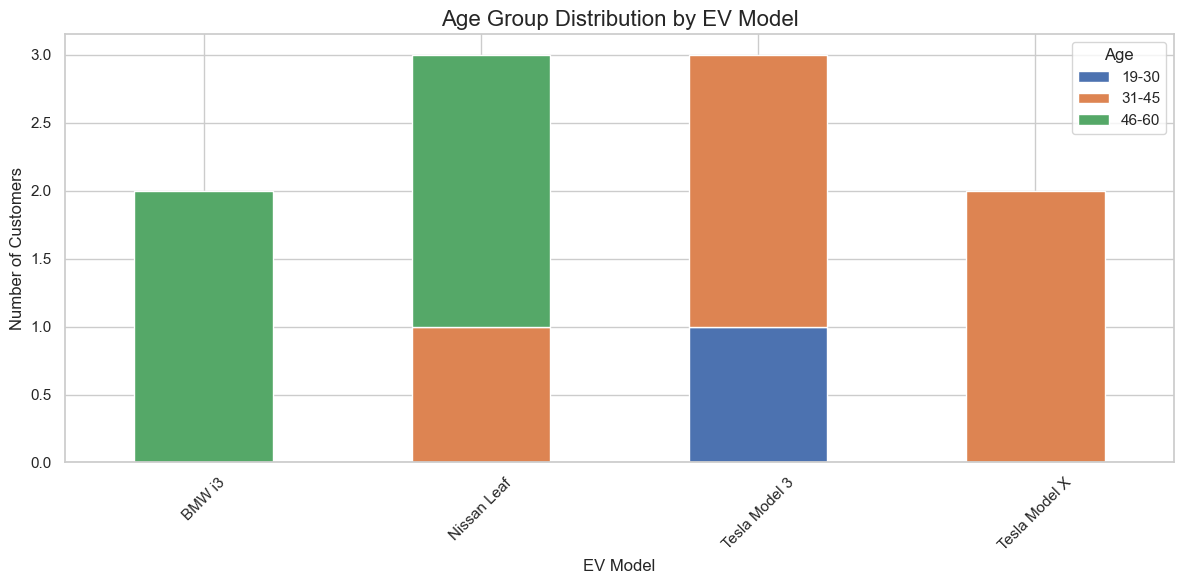

In [1]:
# ev_sales_analysis.ipynb

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Step 2: Load the Dataset
file_path = 'ev_sales_data.csv'  # Make sure the file is in the correct directory
data = pd.read_csv(file_path)

# Preview the data
data.head()

# Step 3: Clean the Data
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Convert 'Sale Date' to datetime
data['Sale Date'] = pd.to_datetime(data['Sale Date'])

# Ensure numerical columns are of correct types
data['Sales Price'] = pd.to_numeric(data['Sales Price'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Display cleaned data info
data.info()

# Step 4: Analyze Distribution of EV Sales by Model
ev_model_counts = data['EV Model'].value_counts()

# Plot distribution of EV sales by model
plt.figure(figsize=(10, 6))
ev_model_counts.plot(kind='bar', color='lightblue')
plt.title("Distribution of EV Sales by Model", fontsize=16)
plt.ylabel("Number of Sales", fontsize=12)
plt.xlabel("EV Model", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Visualize Average Sales Price per EV Model
avg_sales_price = data.groupby('EV Model')['Sales Price'].mean()

# Plot average sales price by EV model
plt.figure(figsize=(10, 6))
avg_sales_price.plot(kind='bar', color='orange')
plt.title("Average Sales Price per EV Model", fontsize=16)
plt.ylabel("Average Sales Price ($)", fontsize=12)
plt.xlabel("EV Model", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Identify the Most Common Age Groups for Each EV Model
age_groups = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+'])

# Group by EV model and age group
age_group_distribution = pd.crosstab(data['EV Model'], age_groups)

# Plot the distribution of age groups for each EV model
age_group_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Age Group Distribution by EV Model", fontsize=16)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlabel("EV Model", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
